### Nama : Muhammad Nuril Huda
### Alamat : Malang, Jawa Timur

In [1]:
!pip install split-folders

In [24]:
import tensorflow as tf
import zipfile, os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [25]:
print(tf.__version__)

2.5.0


In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-28 07:11:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.96MB/s    in 85s     

2021-06-28 07:12:57 (3.60 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [57]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [58]:
paper_imgs = os.listdir(train_paper_dir)
rock_imgs = os.listdir(train_rock_dir)
scissors_imgs = os.listdir(train_scissors_dir)

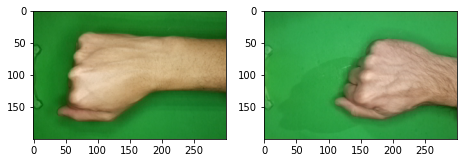

In [59]:
plt.figure(figsize=(20, 5))
for i, img_path in enumerate(rock_imgs[:2]):
    sp = plt.subplot(1,5,i+1)
    img = mpimg.imread(os.path.join(train_rock_dir, img_path))
    plt.imshow(img)
plt.show()

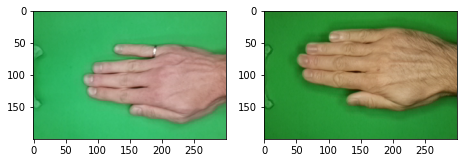

In [60]:
plt.figure(figsize=(20,5))
for i, img_path in enumerate(paper_imgs[:2]):
    sp=plt.subplot(1,5,i+1)
    img=mpimg.imread(os.path.join(train_paper_dir, img_path))
    plt.imshow(img)
plt.show()

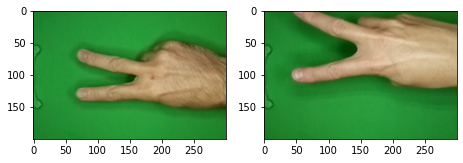

In [61]:
plt.figure(figsize=(20,5))
for i, img_path in enumerate(scissors_imgs[:2]):
    sp=plt.subplot(1,5,i+1)
    img=mpimg.imread(os.path.join(train_scissors_dir, img_path))
    plt.imshow(img)
plt.show()

In [64]:
train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.4
)

In [65]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [66]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [68]:
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [69]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [70]:
model.fit(train_generator,
          steps_per_epoch=25,
          epochs=20,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20
25/25 - 25s - loss: 1.5065 - accuracy: 0.3545 - val_loss: 1.0987 - val_accuracy: 0.3375
Epoch 2/20
25/25 - 24s - loss: 1.0971 - accuracy: 0.3494 - val_loss: 1.0965 - val_accuracy: 0.3250
Epoch 3/20
25/25 - 25s - loss: 1.0531 - accuracy: 0.4437 - val_loss: 0.9479 - val_accuracy: 0.6313
Epoch 4/20
25/25 - 24s - loss: 0.7606 - accuracy: 0.6468 - val_loss: 0.5098 - val_accuracy: 0.8125
Epoch 5/20
25/25 - 25s - loss: 0.5123 - accuracy: 0.7937 - val_loss: 0.3721 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 24s - loss: 0.3830 - accuracy: 0.8550 - val_loss: 0.3391 - val_accuracy: 0.9062
Epoch 7/20
25/25 - 24s - loss: 0.3625 - accuracy: 0.8506 - val_loss: 0.3763 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 24s - loss: 0.3104 - accuracy: 0.8870 - val_loss: 0.2768 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 24s - loss: 0.2907 - accuracy: 0.8974 - val_loss: 0.3325 - val_accuracy: 0.8750
Epoch 10/20
25/25 - 24s - loss: 0.2577 - accuracy: 0.9156 - val_loss: 0.3970 - val_accuracy: 0.8438
Epoch 11/

In [73]:
score = model.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

42/42 [==============================] - 16s 383ms/step - loss: 0.1644 - accuracy: 0.9536
Loss: 0.16
Accuracy: 0.95


In [75]:
score = model.evaluate(validation_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

28/28 [==============================] - 11s 381ms/step - loss: 0.2043 - accuracy: 0.9325
Loss: 0.20
Accuracy: 0.93


Saving the-palm-of-your-hand-finger-hand-let-rock-paper-scissors.jpg to the-palm-of-your-hand-finger-hand-let-rock-paper-scissors (6).jpg
the-palm-of-your-hand-finger-hand-let-rock-paper-scissors.jpg

Paper


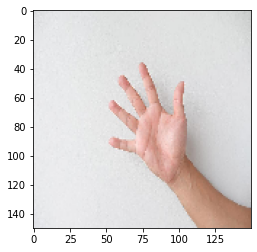

In [56]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0] == 1.0:
    print('\nPaper')
  elif classes[0,1] == 1.0:
    print('\nRock')
  else:
    print('\nScissors')
